In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
plt.style.use('seaborn-white')

# Visualization with Matplotlib
    Multiple Subplots
    Text and Annotation
    Customizing Ticks

## Multiple Subplots

Sometimes we want to compare different view of our data side by side. These subplots can be insets, girds, or other layouts.

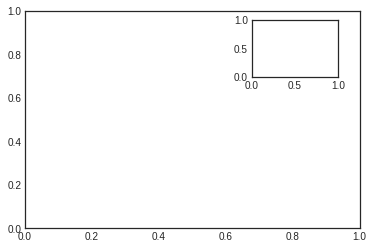

In [3]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2]) #create second axis with a list specifying the [left, bottom, width, height]
#65% x and y position of the figure and 20% of the width and heigh of the figure

The equivalent of this command within the object-oriented interface is **fig.add_axes()**. Let's use this to create two vertically stacked axes:

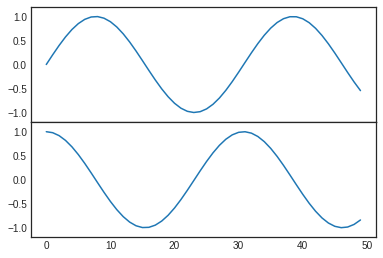

In [4]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create. The lowest level of these is **plt.subplot()**, which creates a single subplot within a grid.

This takes 3 integer arguments;

+ number of rows
+ number of columns
+ index of the plot to be created (runs from upper left to bottom right

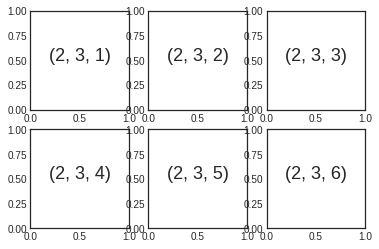

In [5]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

The command plt.subplots_adjust can be used to adjust the spacing between these plots. 

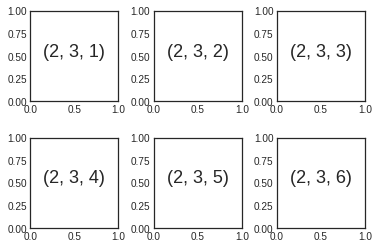

In [6]:
plt.subplots_adjust(hspace=0.4, wspace=0.4) #40% of subplot width and height
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

The following code uses the equivalent object-oriented command, **fig.add_subplot()**:

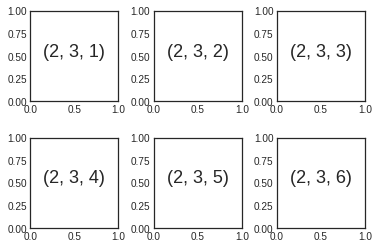

In [7]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4) #40% of subplot width and height
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

When creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots, **plt.subplots()** is the easier tool to use **(note the s at the end of subplots)**. 

Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array. The arguments are the number of rows and number of columns, along with optional keywords sharex and sharey, which allow you to specify the relationships between different axes.

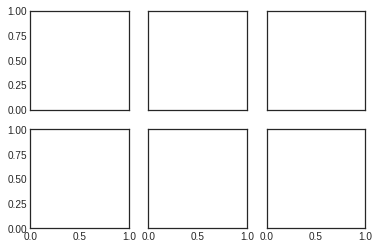

In [8]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

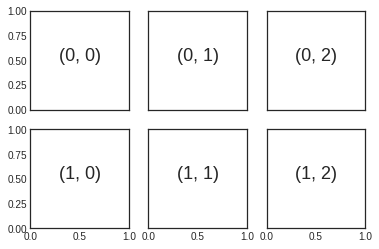

In [9]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

To go beyond a regular grid to subplots that span multiple rows and columns, **plt.GridSpec()** is the best tool. 

In [10]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3) #2 rows, 3 cols

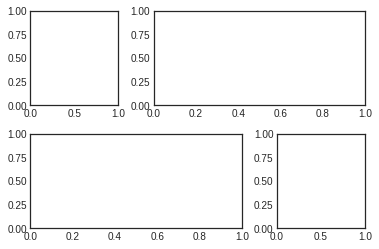

In [11]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

This is generally useful when creating multi=axes histogram plots;

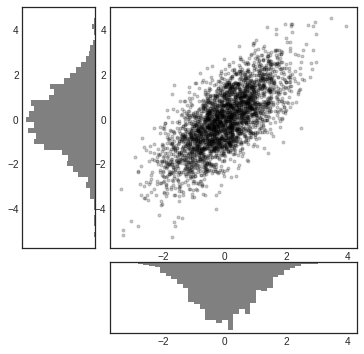

In [12]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

## Text and Annoatation

In [13]:
plt.style.use('seaborn-whitegrid')

Creating a good visualization involves guiding the reader so that the figure tells a story. In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary.

**Here we go beyond axes labels and titles.**

### Example: Effect of Holidays on US Births

Below is the same cleaning procedure used in the pivot tables chapter, and the plot the results:

In [14]:
births = pd.read_csv('data/births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

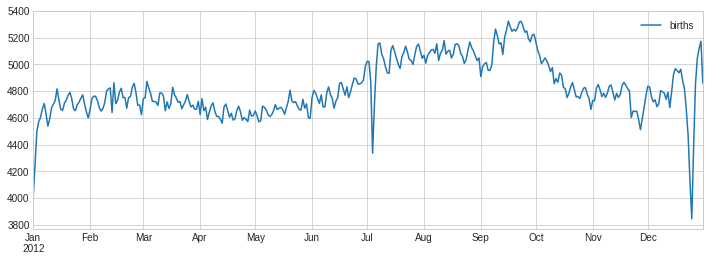

In [15]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

We can text done manually with the **plt.text/ax.text** command, which will place text at a particular x/y value:

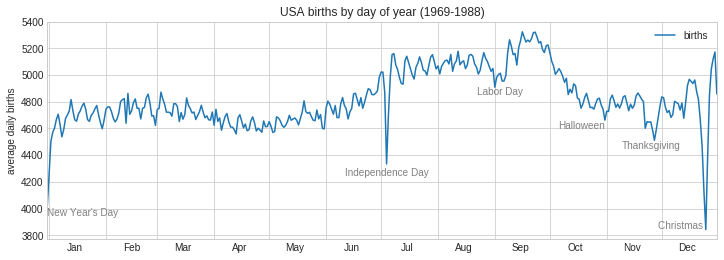

In [16]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

Above the text annotations are anchored to data location, but text can also be anchored to a position on the axes or figure. We do this by modifying the transform.

 There are three pre-defined transforms that can be useful in this situation:

+ **ax.transData:** Transform associated with data coordinates
+ **ax.transAxes:** Transform associated with the axes (in units of axes dimensions)
+ **fig.transFigure:** Transform associated with the figure (in units of figure dimensions)

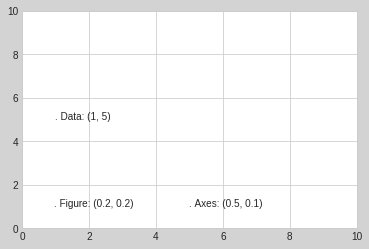

In [17]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

The **transData** coordinates give the usual data coordinates associated with the x- and y-axis labels. 

The **transAxes** coordinates give the location from the bottom-left corner of the axes (here the white box), as a fraction of the axes size. 

The **transFigure** coordinates are similar, but specify the position from the bottom-left of the figure (here the gray box), as a fraction of the figure size.

Only **transData** will be affected if the axes limits are changed.

To add an arrow to the graph we want to use **plt.annotate()**. It creates some text and an arrow.

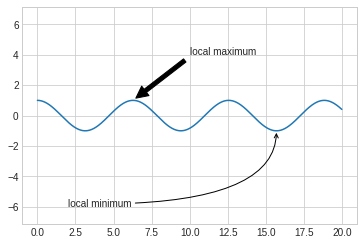

In [18]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05)) #uses default arrow style

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

Take a look at all these arrows!

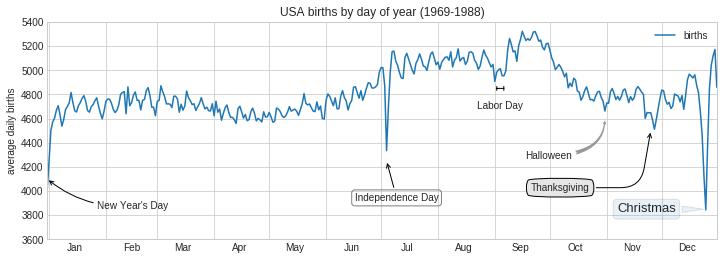

In [19]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

## Customizing Ticks

The most common tick operation is hiding ticks, this is done with **plt.NullLocator()** and **plt.NullFormatter()**.

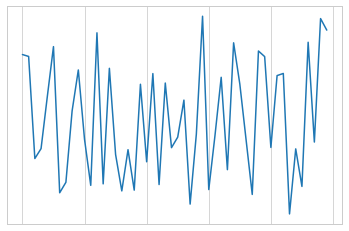

In [20]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

When would no ticks at all be very useful? How about a gird of images? 

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /home/scott/scikit_learn_data


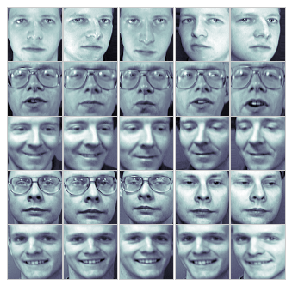

In [21]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

Fixing crowded subplots, like the example below;

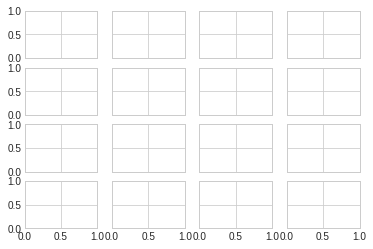

In [23]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

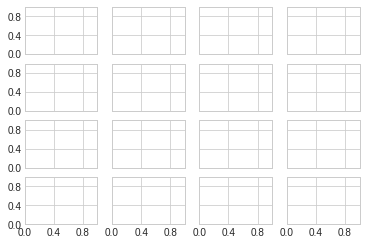

In [24]:
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

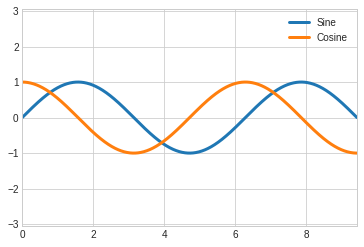

In [25]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

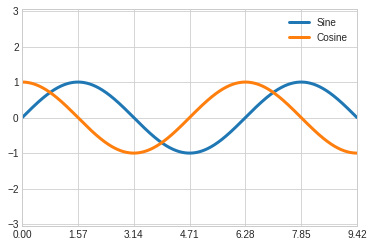

In [26]:
#let's space the tick in multiples of pi

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

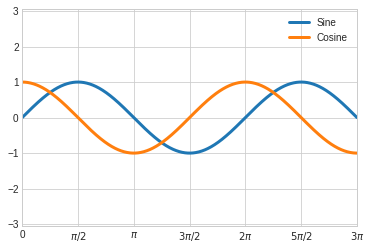

In [27]:
#the decimals look a little wonky, so let,s fix that.

def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

The **plt.FuncFormatter()** offers extremely fine-grained control over the appearance of your plot ticks, and comes in very handy when preparing plots for presentation or publication.

We've mentioned a couple of the available formatters and locators. Below are a bunch more;


|Locator class|	Description
| :-----: | :-----:
|NullLocator|	No ticks
|FixedLocator|	Tick locations are fixed
|IndexLocator|	Locator for index plots (e.g., where x = range(len(y)))
|LinearLocator|	Evenly spaced ticks from min to max
|LogLocator|	Logarithmically ticks from min to max
|MultipleLocator|	Ticks and range are a multiple of base
|MaxNLocator|	Finds up to a max number of ticks at nice locations
|AutoLocator|	(Default.) MaxNLocator with simple defaults.
|AutoMinorLocator|	Locator for minor ticks
|Formatter Class|	Description
|NullFormatter|	No labels on the ticks
|IndexFormatter|	Set the strings from a list of labels
|FixedFormatter|	Set the strings manually for the labels
|FuncFormatter|	User-defined function sets the labels
|FormatStrFormatter|	Use a format string for each value
|ScalarFormatter|	(Default.) Formatter for scalar values
|LogFormatter|	Default formatter for log axes